
**Name:** Abhinav A Mishra

**Roll No:** 24AI005

---

## Part 1: Tabular Data Processing

Read and visualize the data for various tabular, spreadsheet, and interchange data formats:
*   "Table" — generic tabular data (.dat)
*   "CSV" — comma-separated values (.csv)
*   "TSV" — tab-separated values (.tsv)
*   “ARFF” - Attribute-Relation File Format (.arff)
*   "XLS" — Excel spreadsheet (.xls)
*   "XLSX" — Excel 2007 format (.xlsx)
*   "ODS" — OpenDocument spreadsheet (.ods)
*   "SXC" — OpenOffice 1.0 spreadsheet file (.sxc)
*   "DIF" — VisiCalc data interchange format (.dif)

Explore suitable Python packages for reading these files.

In [4]:
%pip install pandas numpy matplotlib seaborn scipy openpyxl odfpy xlrd scikit-learn
%pip install opencv-python pydicom SimpleITK pillow moviepy pygame librosa soundfile json5
%pip install beautifulsoup4 pypdf2 textract wordcloud ubjson mysql-connector-python h5py PyPDF2 textract wordcloud ubjson mysql-connector-python h5py

Note: you may need to restart the kernel to use updated packages.
  Using cached opencv_python-4.13.0.90-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached pydicom-3.0.1-py3-none-any.whl.metadata (9.4 kB)
  Using cached simpleitk-2.5.3-cp311-abi3-win_amd64.whl.metadata (7.3 kB)
  Using cached moviepy-2.2.1-py3-none-any.whl.metadata (6.9 kB)
  Using cached pygame-2.6.1.tar.gz (14.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [123 lines of output]
      Skipping Cython compilation
      
      
      WARNING, No "Setup" File Exists, Running "buildconfig/config.py"
      Using WINDOWS configuration...
      
      Making dir :prebuilt_downloads:
      Downloading... https://www.libsdl.org/release/SDL2-devel-2.28.4-VC.zip 25ef9d201ce3fd5f976c37dddedac36bd173975c
      Unzipping :prebuilt_downloads\SDL2-devel-2.28.4-VC.zip:
      Downloading... https://www.libsdl.org/projects/SDL_image/release/SDL2_image-devel-2.0.5-VC.zip 137f86474691f4e12e76e07d58d5920c8d844d5b
      Unzipping :prebuilt_downloads\SDL2_image-devel-2.0.5-VC.zip:
      Downloading... https://github.com/libsdl-org/SDL_ttf/releases/download/release-2.20.1/SDL2_ttf-devel-2.20.1-VC.zip 371606aceba450384428fd2852f73d2f6290b136
      
      ---
      For help with compilation see:
          https://www.pygame.org/wiki/Comp

  Using cached beautifulsoup4-4.14.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached pypdf2-3.0.1-py3-none-any.whl.metadata (6.8 kB)
  Using cached textract-1.6.5-py3-none-any.whl.metadata (2.5 kB)
  Using cached textract-1.6.4.tar.gz (17 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


Requested textract from https://files.pythonhosted.org/packages/6b/3e/ac16b6bf28edf78296aea7d0cb416b49ed30282ac8c711662541015ee6f3/textract-1.6.5-py3-none-any.whl has invalid metadata: .* suffix can only be used with `==` or `!=` operators
    extract-msg (<=0.29.*)
                 ~~~~~~~^
Please use pip<24.1 if you need to use this version.
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [3 lines of output]
      error in textract setup command: 'install_requires' must be a string or iterable of strings containing valid project/version requirement specifiers; .* suffix can only be used with `==` or `!=` operators
          extract-msg<=0.29.*
                     ~~~~~~~^
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
ERROR: Failed to build 'textract' when getting requirements to build wheel


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import h5py
import scipy.io
import sqlite3
import zipfile
import os
import glob
from scipy.io import arff

ModuleNotFoundError: No module named 'h5py'

Read these files inside the python code. Some of the file formats cannot be read using
default python packages. In this case, explore the python packages suitable for reading the
files.

In [ ]:
DATA_DIR = '.' 

def get_file_list(directory):
    """Finds all supported tabular data files in the directory."""
    supported_extensions = ['*.csv', '*.tsv', '*.dat', '*.xls', '*.xlsx', '*.ods', '*.arff']
    files = []
    for ext in supported_extensions:
        files.extend(glob.glob(os.path.join(directory, ext)))
    return files

def read_seamless(file_path):
    """Reads a file based on its extension and returns a DataFrame."""
    ext = file_path.split('.')[-1].lower()
    filename = os.path.basename(file_path)
    df = None
    
    print(f"Loading {filename}...", end=" ")
    
    try:
        if ext == 'csv':
            # low_memory=False helps with mixed type warnings
            df = pd.read_csv(file_path, low_memory=False)
        elif ext == 'tsv':
            df = pd.read_csv(file_path, sep='\t', low_memory=False)
        elif ext == 'dat':
            # Assuming whitespace separator for .dat
            df = pd.read_csv(file_path, sep=r'\s+', engine='python')
        elif ext in ['xls', 'xlsx', 'ods']:
            df = pd.read_excel(file_path)
        elif ext == 'arff':
            data, meta = arff.loadarff(file_path)
            df = pd.DataFrame(data)
            # Decode byte strings common in ARFF
            str_df = df.select_dtypes([object])
            if not str_df.empty:
                str_df = str_df.stack().str.decode('utf-8').unstack()
                for col in str_df: df[col] = str_df[col]
        
        print(f"Success! Shape: {df.shape}")
        return filename, df
        
    except Exception as e:
        print(f"Failed. Error: {e}")
        return filename, None

# --- Execute Loading ---
all_files = get_file_list(DATA_DIR)
datasets = {}

for f_path in all_files:
    name, data = read_seamless(f_path)
    if data is not None:
        datasets[name] = data

# If no files found (e.g., waiting for download), create a dummy for demonstration
if not datasets:
    print("\nNo data files found. Creating a dummy dataset for code demonstration.")
    datasets['dummy.csv'] = pd.DataFrame(np.random.rand(10, 5), columns=list('ABCDE'))

Loading Salaries.csv... Success! Shape: (148654, 13)
Loading house-price.tsv... Success! Shape: (544, 13)
Loading data.xlsx... Success! Shape: (4, 3)
Loading diabetes.arff... Success! Shape: (768, 9)


Print the properties of the data files such as size, shape, dimensions, number of rows
and columns etc.

In [ ]:
for filename, df in datasets.items():
    if df is not None:
        print("-" * 40)
        print(f"Properties for file: {filename}")
        print("-" * 40)
        
        print(f"  Shape (rows, columns): {df.shape}")
        print(f"  Number of dimensions: {df.ndim}")
        print(f"  Total elements (size): {df.size}")
        print(f"  Columns: {list(df.columns)}")
        print(f"  Missing values:\n{df.isnull().sum()}")
        print(f"  Duplicate rows: {df.duplicated().sum()}")
        
        # FIX: Print dtypes separately
        print("\n  Data Types:")
        print(df.dtypes)
        
        # FIX: Call info() separately because it prints directly
        print("\n  Memory Usage & Info:")
        df.info(memory_usage='deep') 
        
        # Optional: distinct separator before the next file
        print("\n" + "="*40 + "\n")
    else:
        print(f"Skipping {filename} (Dataframe is None)")

----------------------------------------
Properties for file: Salaries.csv
----------------------------------------
  Shape (rows, columns): (148654, 13)
  Number of dimensions: 2
  Total elements (size): 1932502
  Columns: ['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency', 'Status']
  Missing values:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64
  Duplicate rows: 0

  Data Types:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay              object
OvertimePay          object
OtherPay             object
Benefits             object
TotalPay 

Perform matrix related operations such as transpose, inversion, dot product (with transpose of same matrix).

In [ ]:
def perform_matrix_ops(name, df):
    print(f"--- Matrix Operations for {name} ---")
    
    # 1. Select only numeric data
    df_num = df.select_dtypes(include=[np.number])
    
    if df_num.empty:
        print("Skipping: No numeric data found.\n")
        return

    matrix = df_num.fillna(0).values
    
    # Limit size for readability/performance if matrix is huge
    if matrix.shape[0] > 1000:
        matrix = matrix[:100, :10] 
        print("(Using top-left 100x10 sub-matrix for demo)")

    try:
        T = matrix.T
        print(f"Transpose Shape: {T.shape}")
        
        # Dot Product (Matrix * Transpose)
        # Note: If matrix is huge, this might be slow, so we take a smaller slice for dot product
        small_slice = matrix[:50, :] 
        dot_p = np.dot(small_slice, small_slice.T)
        print(f"Dot Product (of top 50 rows): {dot_p.shape}")
        
        # Inversion (Requires Square Matrix)
        # We perform inversion on the correlation matrix (which is always square)
        # or a square slice of the data
        rows, cols = matrix.shape
        n = min(rows, cols, 50) # Limit to 50x50 for stability
        square_matrix = matrix[:n, :n]
        
        # Add slight noise to diagonal to prevent singular matrix error
        square_matrix = square_matrix + np.eye(n) * 0.01 
        
        inv = np.linalg.inv(square_matrix)
        print(f"Inversion Successful on {n}x{n} slice.")
        
    except Exception as e:
        print(f"Matrix operation error: {e}")
    print("\n")

for name, df in datasets.items():
    perform_matrix_ops(name, df)

--- Matrix Operations for Salaries.csv ---
(Using top-left 100x10 sub-matrix for demo)
Transpose Shape: (5, 100)
Dot Product (of top 50 rows): (50, 50)
Inversion Successful on 5x5 slice.


--- Matrix Operations for house-price.tsv ---
Transpose Shape: (6, 544)
Dot Product (of top 50 rows): (50, 50)
Inversion Successful on 6x6 slice.


--- Matrix Operations for data.xlsx ---
Transpose Shape: (1, 4)
Dot Product (of top 50 rows): (4, 4)
Inversion Successful on 1x1 slice.


--- Matrix Operations for diabetes.arff ---
Transpose Shape: (8, 768)
Dot Product (of top 50 rows): (50, 50)
Inversion Successful on 8x8 slice.




Visualize each of these data files using graphs, diagrams, etc. Table data visualization: line graph, bar graph, histogram chart, pie chart, scatter plot (Choose applicable columns). Save the plot to disk.

Generating plots for Salaries.csv...
   (Ignoring ID-like columns for plotting: ['Id', 'Notes'])


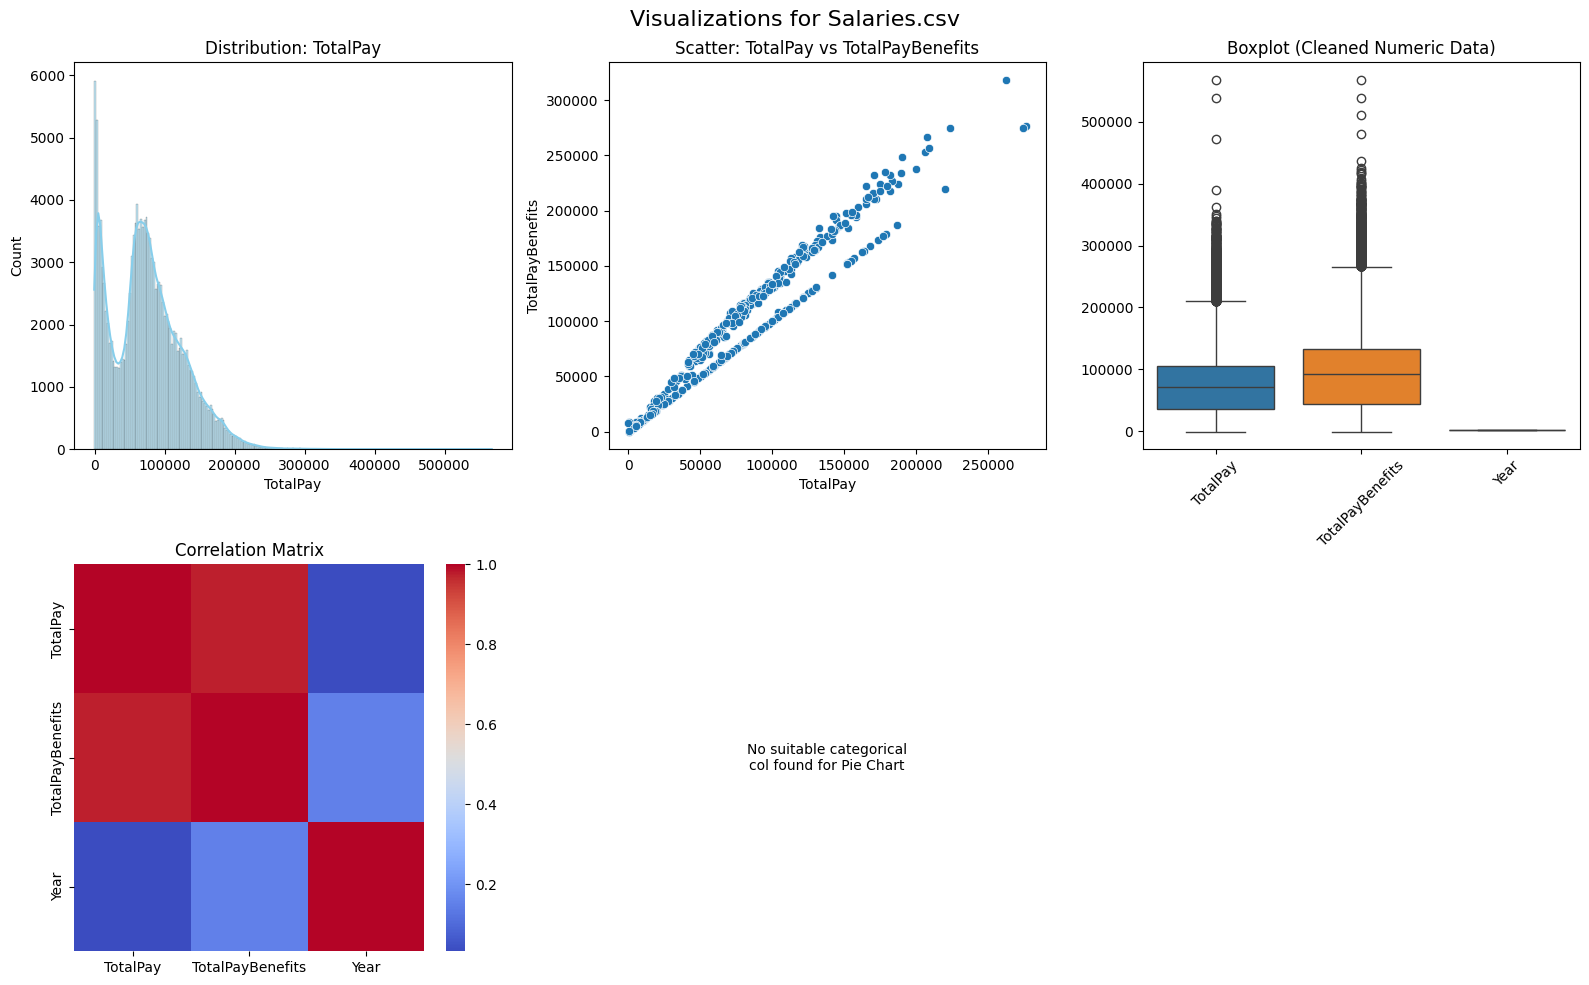

------------------------------------------------------------
Generating plots for house-price.tsv...


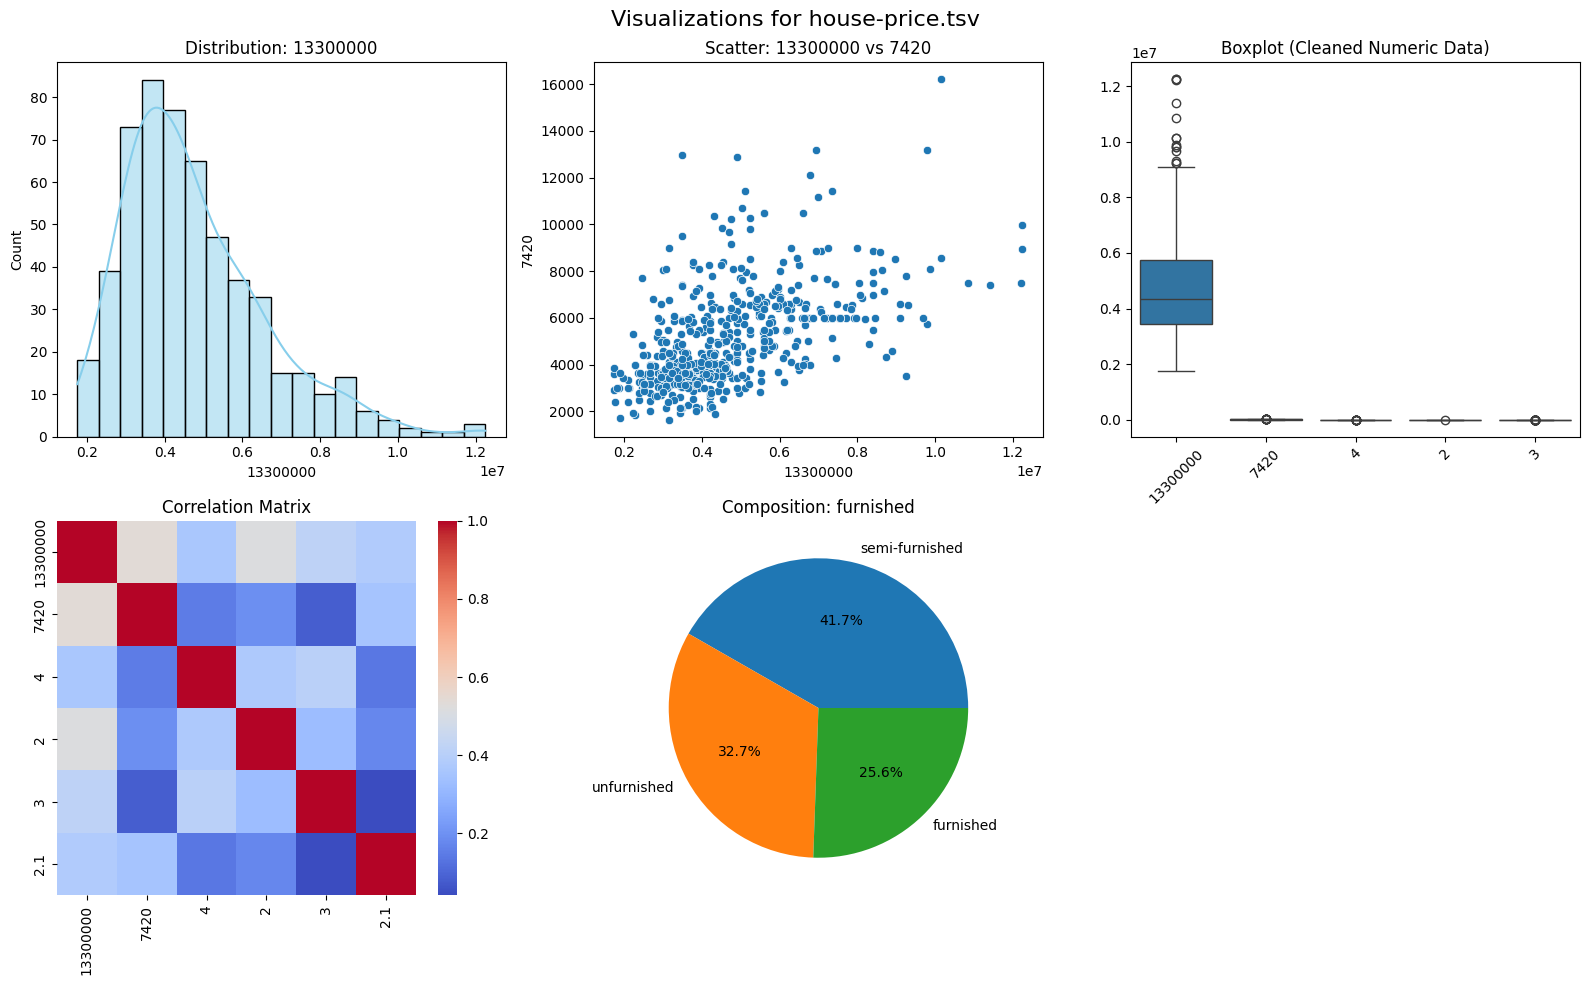

------------------------------------------------------------
Generating plots for data.xlsx...


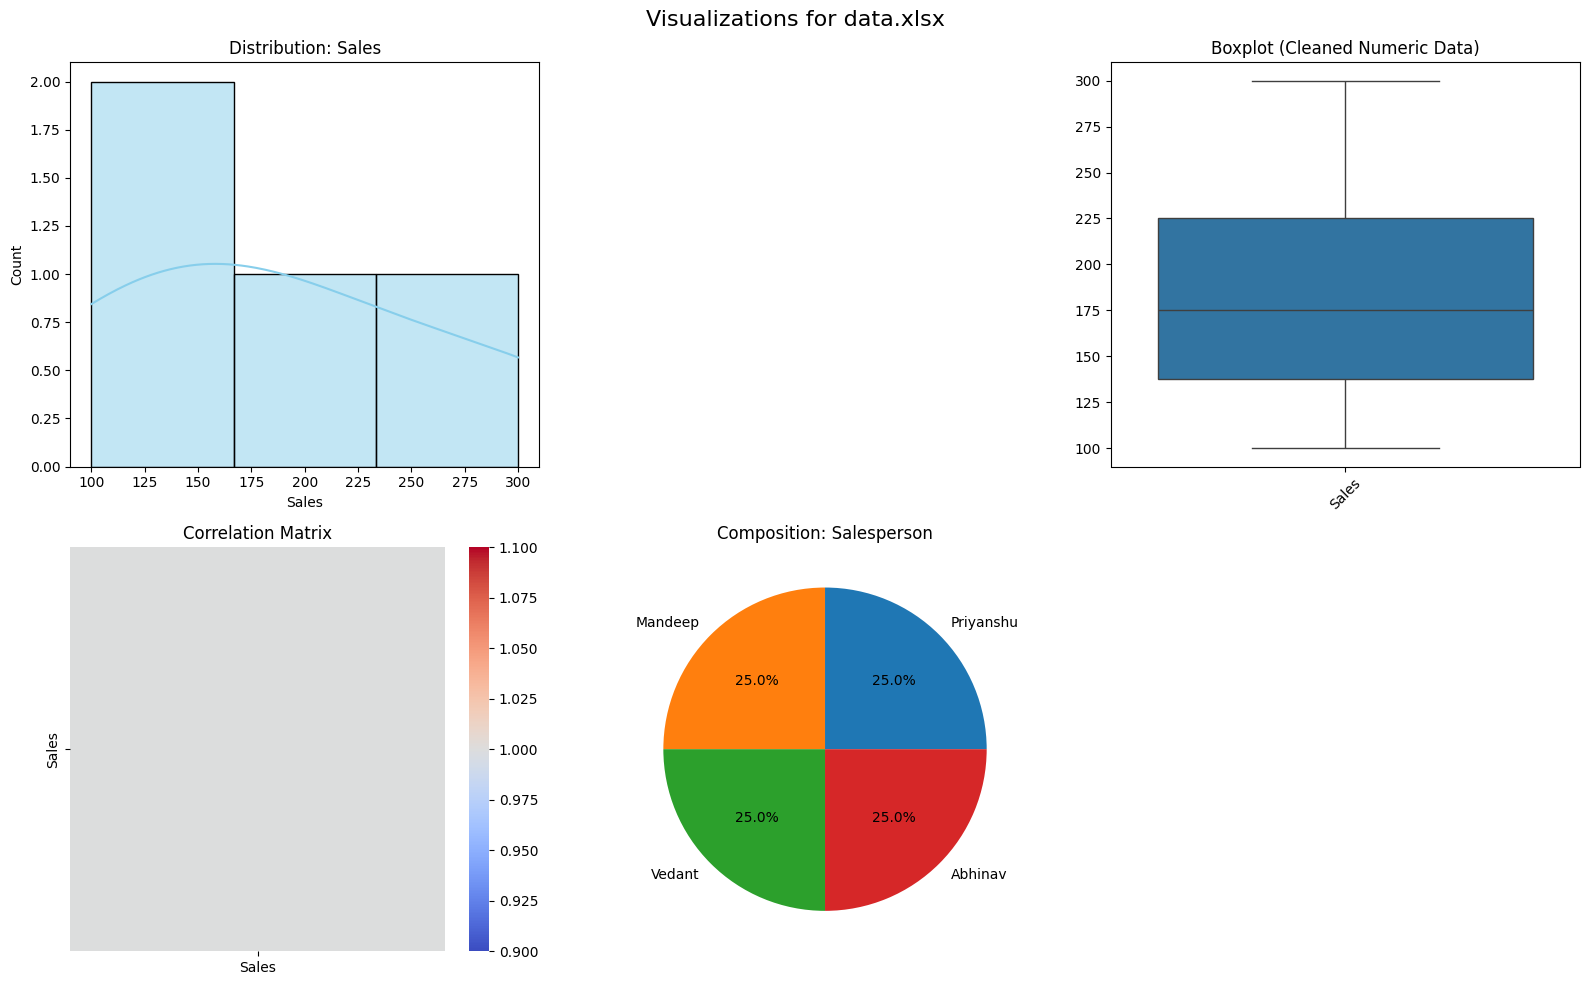

------------------------------------------------------------
Generating plots for diabetes.arff...


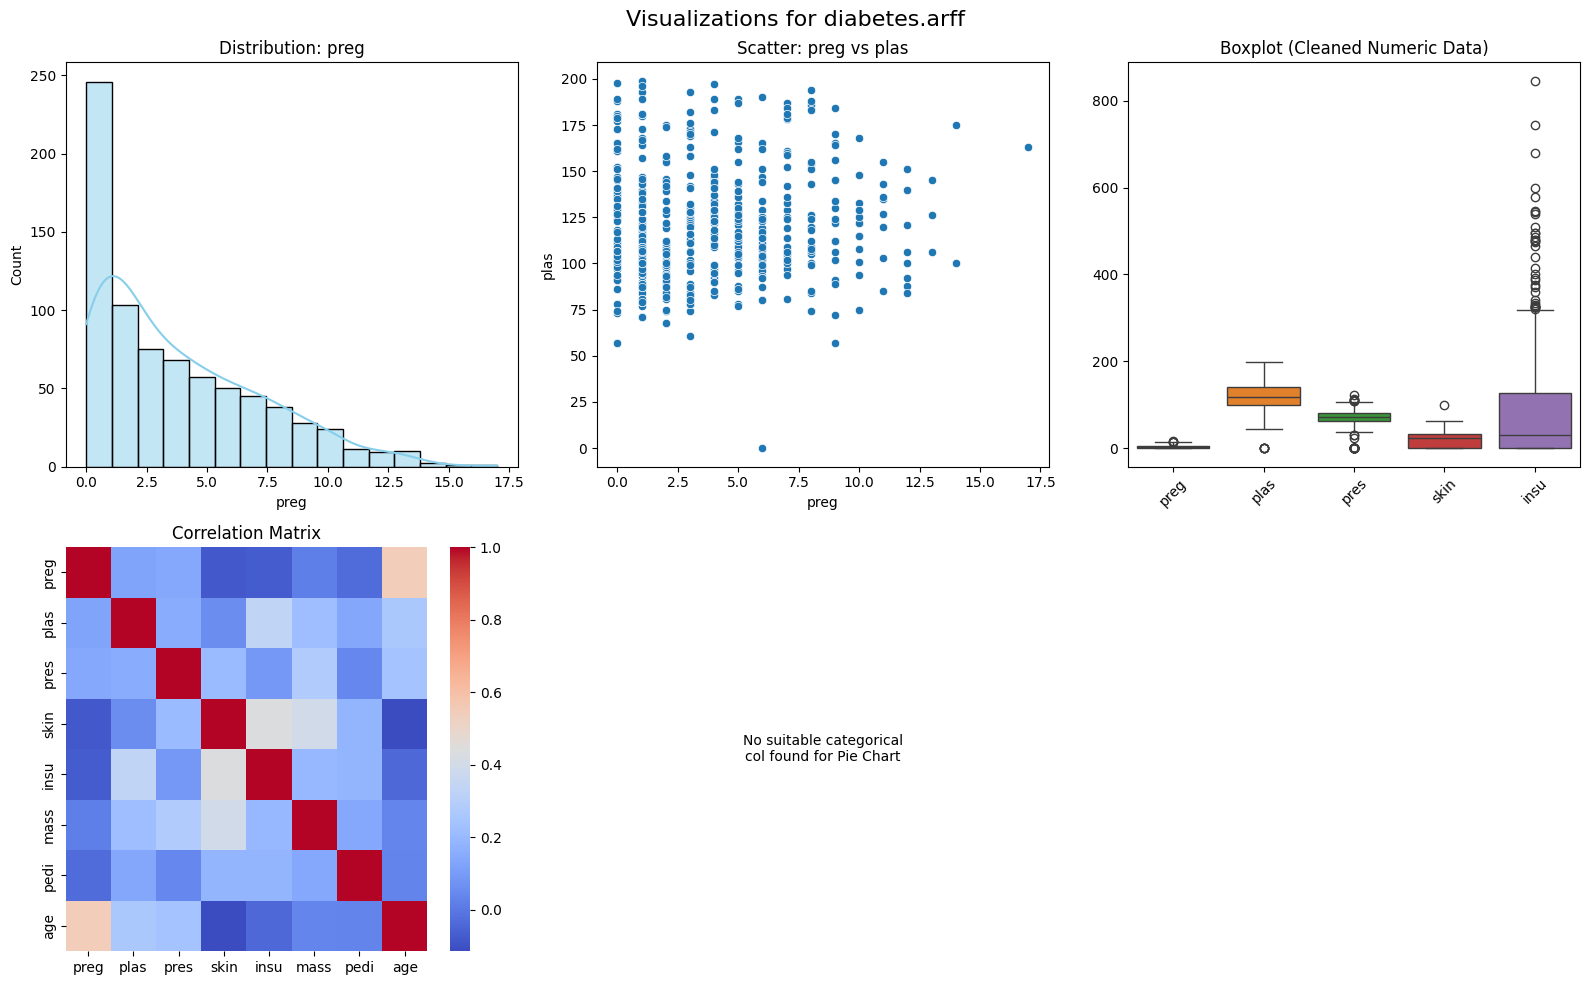

------------------------------------------------------------


In [ ]:
def get_meaningful_numeric_data(df):
    """
    Heuristic to remove ID-like columns (monotonic increasing integers 
    or columns with 'id' in the name) to make plots meaningful.
    """
    # 1. Select numeric columns
    num_df = df.select_dtypes(include=[np.number])
    
    # 2. Identify columns to drop
    cols_to_drop = []
    for col in num_df.columns:
        # Condition A: Column name looks like an ID
        if any(x in col.lower() for x in ['id', 'no.', 'rank', 'index', 'code']):
            cols_to_drop.append(col)
            continue
            
        # Condition B: Column is just a sequence (0, 1, 2...) matching row count
        # This catches unnamed indices treated as data
        if len(df) > 1:
            is_sequence = np.array_equal(num_df[col].dropna().values, np.arange(len(num_df.dropna())))
            if is_sequence:
                cols_to_drop.append(col)

    # 3. Drop them
    if cols_to_drop:
        print(f"   (Ignoring ID-like columns for plotting: {cols_to_drop})")
        return num_df.drop(columns=cols_to_drop)
    
    return num_df

def visualize_dataset_smart(name, df):
    print(f"Generating plots for {name}...")
    
    # Use the smart cleaner
    plot_df = get_meaningful_numeric_data(df)
    
    if plot_df.shape[1] < 1:
        print(f"   Skipping plots: No meaningful numeric data found after cleaning.\n")
        return

    plt.figure(figsize=(16, 10))
    plt.suptitle(f"Visualizations for {name}", fontsize=16)
    
    # 1. Histogram (Distribution of 1st meaningful column)
    plt.subplot(2, 3, 1)
    col1 = plot_df.columns[0]
    sns.histplot(plot_df[col1].dropna(), kde=True, color='skyblue')
    plt.title(f"Distribution: {col1}")
    
    # 2. Scatter Plot (Find two columns with good variance)
    if plot_df.shape[1] >= 2:
        plt.subplot(2, 3, 2)
        # We pick the first two available columns, assuming IDs are gone
        colX, colY = plot_df.columns[0], plot_df.columns[1]
        sns.scatterplot(data=plot_df.sample(min(len(df), 500)), x=colX, y=colY)
        plt.title(f"Scatter: {colX} vs {colY}")
    
    # 3. Box Plot (Top 5 columns)
    plt.subplot(2, 3, 3)
    sns.boxplot(data=plot_df.iloc[:, :5])
    plt.xticks(rotation=45)
    plt.title("Boxplot (Cleaned Numeric Data)")
    
    # 4. Correlation Heatmap
    plt.subplot(2, 3, 4)
    corr = plot_df.corr()
    sns.heatmap(corr, cmap='coolwarm', annot=False)
    plt.title("Correlation Matrix")
    
    # 5. Pie Chart (Categorical Data)
    # We look for a categorical column with few unique values (e.g., < 10)
    plt.subplot(2, 3, 5)
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    chosen_cat = None
    for c in cat_cols:
        if 2 < df[c].nunique() < 10: # Pick a column with 3-9 categories
            chosen_cat = c
            break
            
    if chosen_cat:
        val_counts = df[chosen_cat].value_counts()
        plt.pie(val_counts, labels=val_counts.index, autopct='%1.1f%%')
        plt.title(f"Composition: {chosen_cat}")
    else:
        plt.text(0.5, 0.5, "No suitable categorical\ncol found for Pie Chart", 
                 ha='center', va='center')
        plt.axis('off')

    plt.tight_layout()
    plt.savefig(f"{name.replace('.','_')}_viz.png")
    plt.show()
    print("-" * 60)

# Execute
for name, df in datasets.items():
    visualize_dataset_smart(name, df)

Save the processed matrices as PKL – Pickle format, HDF5, Zip, SQL, MAT, NPY, NPZ. Reload the saved files back to the python environment.

In [6]:
import pickle
import h5py
import sqlite3
import zipfile

output_dir = "processed_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for name, df in datasets.items():
    base_name = os.path.splitext(name)[0]
    base_path = os.path.join(output_dir, base_name)
    
    print(f"Saving {name} to multiple formats...", end=" ")
    
    try:
        # 1. Pickle
        with open(f"{base_path}.pkl", "wb") as f:
            pickle.dump(df, f)
            
        # 2. HDF5 (Requires purely numeric/string structure, complex for mixed DFs)
        # We convert to HDF fixed format for simplicity
        try:
            df.to_hdf(f"{base_path}.h5", key='data', mode='w')
        except: pass # HDF often fails with object types, skip if so
        
        # 3. Zip (CSV inside Zip)
        df.to_csv(f"{base_path}.zip", compression='zip')
        
        # 4. SQL
        conn = sqlite3.connect(f"{base_path}.db")
        df.to_sql("data", conn, if_exists='replace')
        conn.close()
        
        # 5. NPY/NPZ (Numeric data only)
        num_data = df.select_dtypes(include=[np.number]).fillna(0).values
        np.save(f"{base_path}.npy", num_data)
        np.savez(f"{base_path}.npz", data=num_data)
        
        print("Done.")
        
    except Exception as e:
        print(f"Error saving {name}: {e}")

ModuleNotFoundError: No module named 'h5py'

## Part 2: Audio Visual Textual Dataset Formats

### 1. Image Data Formats
*   Read and display images belong to each of these image formats JPG, PNG, BMP, TIFF. Image reading can be done using Matplotlib/PIL/Opencv packages. Use all three for a single image reading and compare their executing time.
*   Print properties of images such as height, width, number of channels.
*   Perform operations such as conversion to binary, grayscale image formats, cropping the image, rescaling the image etc.
*   Read and visualize 3D medical Images belong to the formats DICOM, MHA.

In [ ]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pydicom
import SimpleITK as sitk

Found 2 standard images and 14 medical images.

Processing Standard Image 1: GyVEbPPXIAYMB5F.jpg
   Time Check -> MPL: 0.01714s | PIL: 0.00062s | CV2: 0.01672s


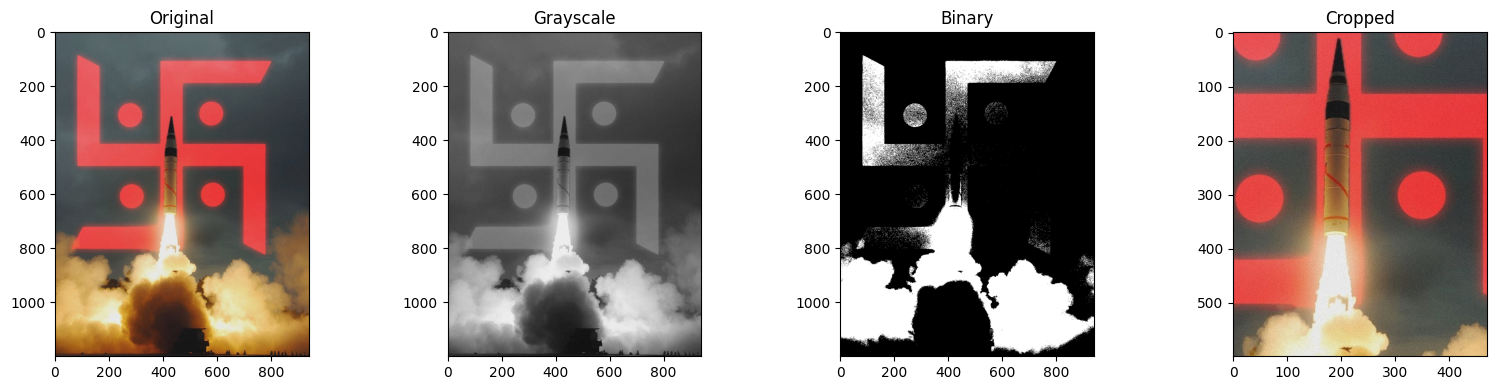

Processing Standard Image 2: Leetcode 50 days.png
   Time Check -> MPL: 0.07828s | PIL: 0.00148s | CV2: 0.03610s


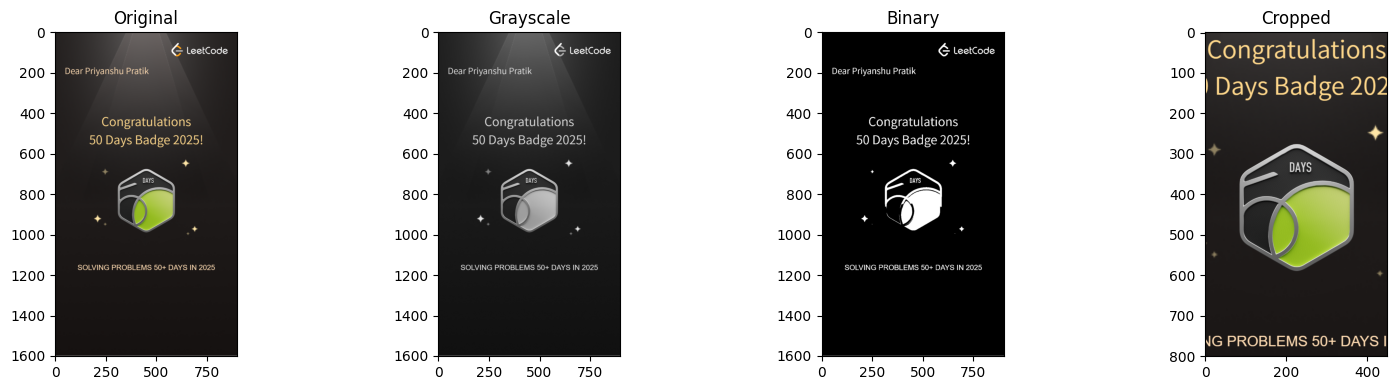

Processing Medical Image 1: image-00000.dcm
   Detected format: DICOM
   Patient ID: 0 | Modality: CT


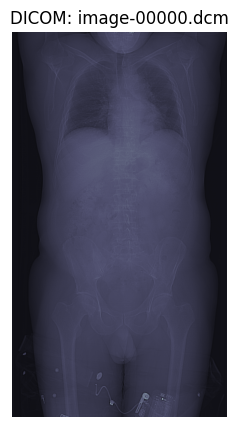

Processing Medical Image 2: image-00001.dcm
   Detected format: DICOM
   Patient ID: 0 | Modality: CT


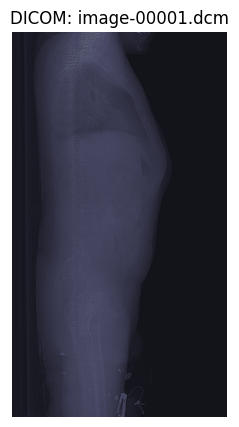

Processing Medical Image 3: image-00007.dcm
   Detected format: DICOM
   Patient ID: 0 | Modality: CT


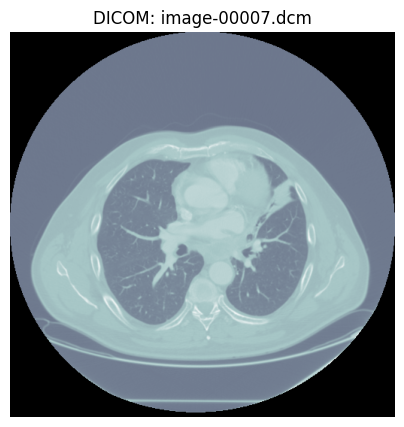

Processing Medical Image 4: image-00015.dcm
   Detected format: DICOM
   Patient ID: 0 | Modality: CT


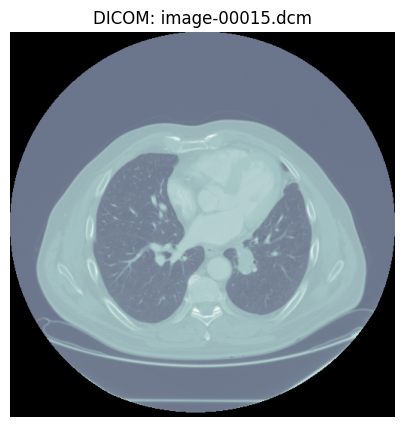

Processing Medical Image 5: image-00023.dcm
   Detected format: DICOM
   Patient ID: 0 | Modality: CT


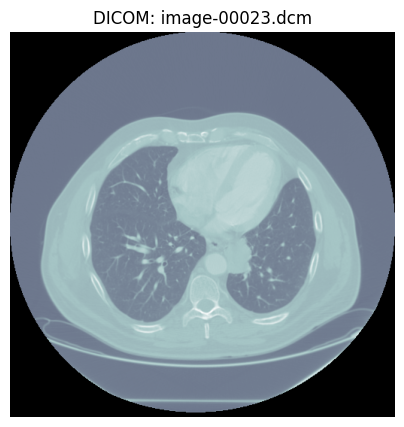

Processing Medical Image 6: image-00034.dcm
   Detected format: DICOM
   Patient ID: 0 | Modality: CT


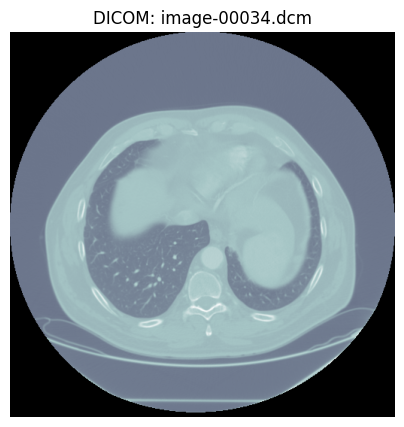

Processing Medical Image 7: image-00035.dcm
   Detected format: DICOM
   Patient ID: 0 | Modality: CT


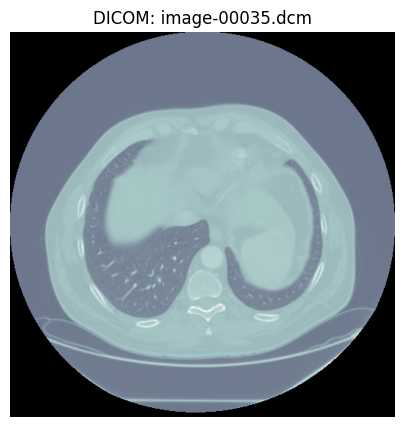

Processing Medical Image 8: image-00053.dcm
   Detected format: DICOM
   Patient ID: 0 | Modality: CT


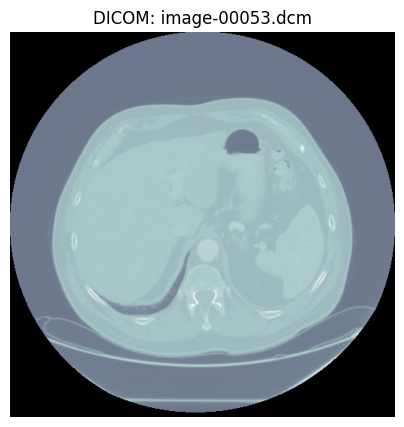

Processing Medical Image 9: image-00081.dcm
   Detected format: DICOM
   Patient ID: 0 | Modality: CT


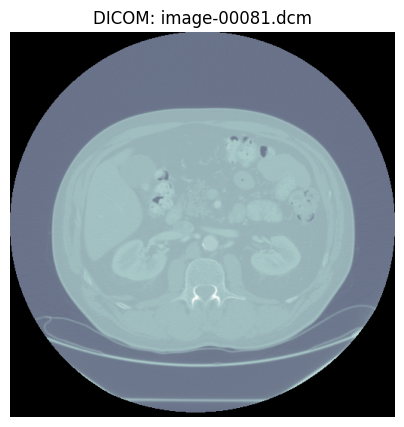

Processing Medical Image 10: image-00131.dcm
   Detected format: DICOM
   Patient ID: 0 | Modality: CT


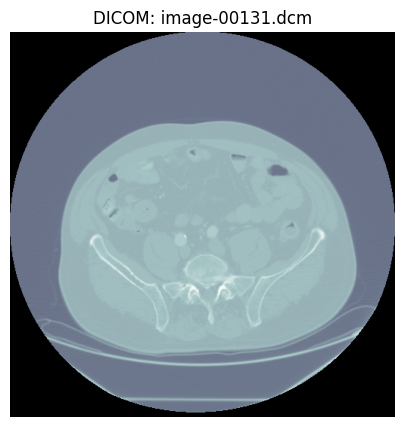

Processing Medical Image 11: image-00133.dcm
   Detected format: DICOM
   Patient ID: 0 | Modality: CT


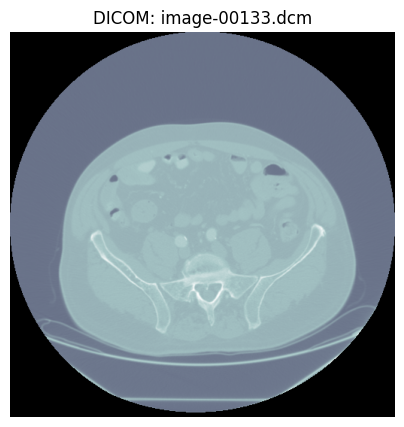

Processing Medical Image 12: image-00157.dcm
   Detected format: DICOM
   Patient ID: 0 | Modality: CT


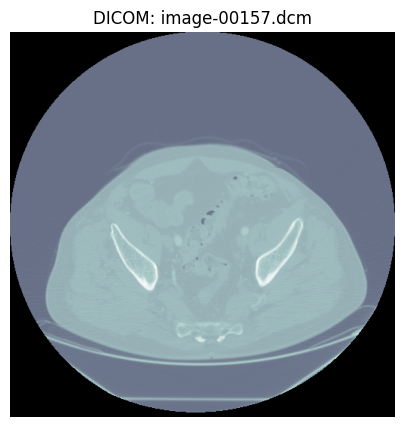

Processing Medical Image 13: image-00160.dcm
   Detected format: DICOM
   Patient ID: 0 | Modality: CT


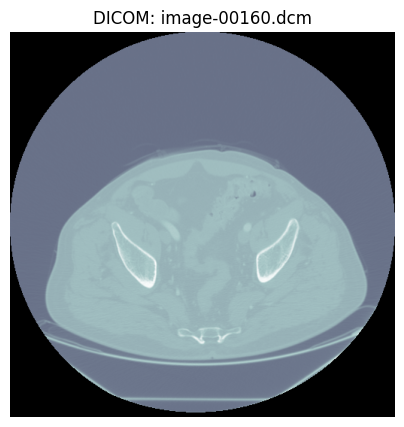

Processing Medical Image 14: headphantom.mha
   Detected format: MHA (MetaImage)
   Dimensions: (108, 512, 512)


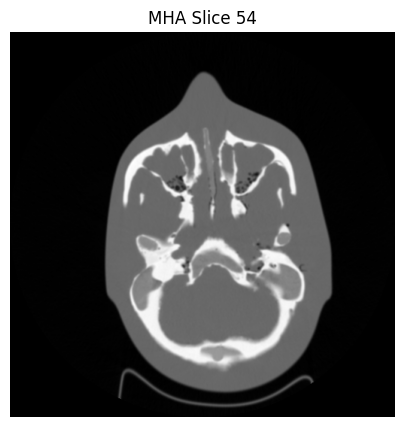

In [ ]:
import cv2
from PIL import Image, UnidentifiedImageError
import pydicom 
import SimpleITK as sitk  # Required for .mha files
import glob
import os
import matplotlib.pyplot as plt
import time
import numpy as np

def process_all_images(directory):
    # Gather all file types
    standard_exts = ['*.jpg', '*.jpeg', '*.png', '*.bmp', '*.tiff']
    medical_exts = ['*.dcm', '*.mha']
    
    all_std_images = []
    for ext in standard_exts:
        all_std_images.extend(glob.glob(os.path.join(directory, ext)))
        
    all_med_images = []
    for ext in medical_exts:
        all_med_images.extend(glob.glob(os.path.join(directory, ext)))
        
    print(f"Found {len(all_std_images)} standard images and {len(all_med_images)} medical images.\n")

    # --- PART A: Process Standard Images ---
    for i, img_path in enumerate(all_std_images):
        filename = os.path.basename(img_path)
        print(f"Processing Standard Image {i+1}: {filename}")
        
        try:
            # 1. Compare Loading Times
            try:
                t0 = time.time(); plt.imread(img_path); t_mpl = time.time() - t0
                t0 = time.time(); Image.open(img_path); t_pil = time.time() - t0
                t0 = time.time(); cv2.imread(img_path); t_cv = time.time() - t0
                
                if i < 3: 
                    print(f"   Time Check -> MPL: {t_mpl:.5f}s | PIL: {t_pil:.5f}s | CV2: {t_cv:.5f}s")
            except Exception:
                pass # Skip timing if file is weird

            # 2. Process with OpenCV
            img = cv2.imread(img_path)
            
            if img is None:
                print(f"   [Error] OpenCV failed to load {filename}. Skipping.")
                continue
            
            # Properties & Operations
            h, w = img.shape[:2]
            c = img.shape[2] if len(img.shape) > 2 else 1
            
            if c == 1:
                gray = img
                img_display = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
            else:
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img_display = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
            
            if h > 10 and w > 10:
                crop = img[h//4:h*3//4, w//4:w*3//4]
            else:
                crop = img
            
            # Display
            fig, ax = plt.subplots(1, 4, figsize=(16, 4))
            ax[0].imshow(img_display); ax[0].set_title("Original")
            ax[1].imshow(gray, cmap='gray'); ax[1].set_title("Grayscale")
            ax[2].imshow(binary, cmap='gray'); ax[2].set_title("Binary")
            
            if crop.size > 0:
                crop_show = cv2.cvtColor(crop, cv2.COLOR_BGR2RGB) if len(crop.shape)==3 else crop
                ax[3].imshow(crop_show); ax[3].set_title("Cropped")
            else:
                ax[3].axis('off')
            
            plt.tight_layout()
            plt.show()
            
        except Exception as e:
            print(f"   [Critical Error] Failed to process {filename}: {e}")
            continue 
        
    # --- PART B: Process Medical Images (DICOM & MHA) ---
    for i, med_path in enumerate(all_med_images):
        filename = os.path.basename(med_path)
        print(f"Processing Medical Image {i+1}: {filename}")
        
        try:
            # === OPTION 1: MHA Files (MetaImage) ===
            if filename.lower().endswith('.mha'):
                print("   Detected format: MHA (MetaImage)")
                # Use SimpleITK for MHA
                itk_image = sitk.ReadImage(med_path)
                img_array = sitk.GetArrayFromImage(itk_image)
                
                print(f"   Dimensions: {img_array.shape}")
                
                # MHA is often 3D (Depth, Height, Width). We display the middle slice.
                if len(img_array.shape) == 3:
                    mid_slice = img_array.shape[0] // 2
                    display_img = img_array[mid_slice]
                    title_txt = f"MHA Slice {mid_slice}"
                else:
                    display_img = img_array
                    title_txt = "MHA Image"

                plt.figure(figsize=(5, 5))
                plt.imshow(display_img, cmap='gray')
                plt.title(title_txt)
                plt.axis('off')
                plt.show()

            # === OPTION 2: DICOM Files (.dcm) ===
            else:
                print("   Detected format: DICOM")
                # Use Pydicom for .dcm
                ds = pydicom.dcmread(med_path)
                
                pid = ds.PatientID if 'PatientID' in ds else 'Unknown'
                modality = ds.Modality if 'Modality' in ds else 'Unknown'
                print(f"   Patient ID: {pid} | Modality: {modality}")
                
                if hasattr(ds, 'pixel_array'):
                    plt.figure(figsize=(5, 5))
                    plt.imshow(ds.pixel_array, cmap=plt.cm.bone) 
                    plt.title(f"DICOM: {filename}")
                    plt.axis('off')
                    plt.show()
                else:
                    print("   [Info] This DICOM file contains no pixel data.")
            
        except Exception as e:
            print(f"   Error reading medical file {filename}: {e}")

# Run the function
process_all_images(DATA_DIR)

### 2. Video Data Formats
*   Download any video you like in the formats MP4, AVI, MPEG. Read and play the video in your ipython notebook.
*   Print properties of the video such as frame rate, frame height & width, total number of frames etc.
*   Save frames of video in a separate folder. Read them again and convert back into original video (audio may me missing in the new video).

In [ ]:
def process_all_videos(directory):
    vid_files = glob.glob(os.path.join(directory, '*.mp4')) + glob.glob(os.path.join(directory, '*.avi'))
    
    if not vid_files:
        print("No video files found.")
        return

    for i, vid_path in enumerate(vid_files):
        filename = os.path.basename(vid_path)
        print(f"\n--- Processing Video {i+1}: {filename} ---")
        
        cap = cv2.VideoCapture(vid_path)
        
        if not cap.isOpened():
            print(f"   Error opening {filename}")
            continue
            
        # Properties
        fps = cap.get(cv2.CAP_PROP_FPS)
        frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        
        print(f"   Resolution: {w}x{h} | FPS: {fps:.2f} | Total Frames: {frame_count}")
        
        # Save Frames & Reconstruct
        # We save frames to a unique folder for each video to avoid overwriting
        frame_dir = f"frames_{filename.replace('.', '_')}"
        if not os.path.exists(frame_dir):
            os.makedirs(frame_dir)
            
        reconstruct_path = f"reconstructed_{filename}"
        out = cv2.VideoWriter(reconstruct_path, cv2.VideoWriter_fourcc(*'DIVX'), fps, (w, h))
        
        curr_frame = 0
        saved_count = 0
        
        while True:
            ret, frame = cap.read()
            if not ret: break
            
            # Save the first 10 frames as images
            if curr_frame < 10:
                cv2.imwrite(os.path.join(frame_dir, f"frame_{curr_frame}.jpg"), frame)
                saved_count += 1
            
            # Write to video reconstruction
            out.write(frame)
            curr_frame += 1
            
        cap.release()
        out.release()
        print(f"   Saved {saved_count} frames to folder '{frame_dir}'")
        print(f"   Reconstructed video saved as '{reconstruct_path}'")

process_all_videos(DATA_DIR)


--- Processing Video 1: Futurama WHAT.mp4 ---
   Resolution: 480x360 | FPS: 29.97 | Total Frames: 193
   Saved 10 frames to folder 'frames_Futurama WHAT_mp4'
   Reconstructed video saved as 'reconstructed_Futurama WHAT.mp4'


### 3. Audio Data Formats
*   Read and play audio files in the formats such as MP3, MIDI, WAV.
*   Audio visualization: audio player, spectrogram.
*   Print properties of the audio files such as sampling rate, length in seconds, bps etc.
*   Extract and visualize audio features such as MFCC, STFT etc. Librosa package can be utilized for the above tasks.


--- Processing Audio 1: hover.wav ---
   Sample Rate: 22050 Hz | Duration: 0.68s


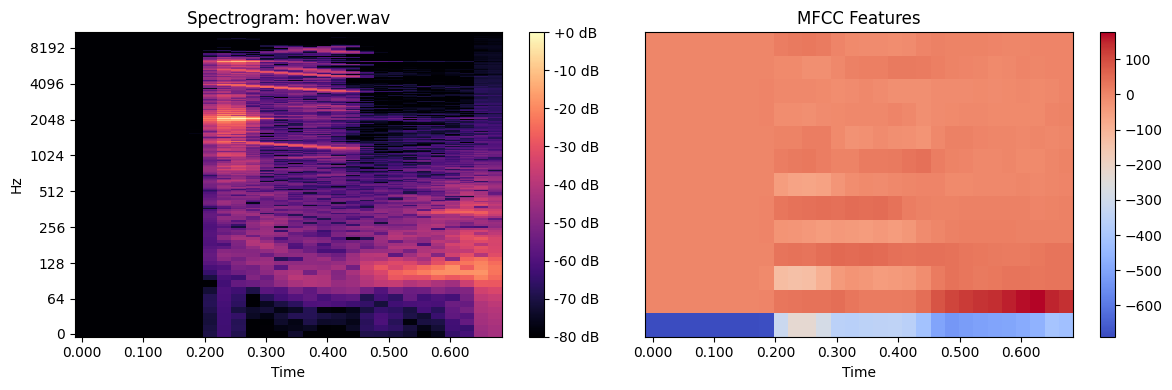


--- Processing Audio 2: Piano_music_GIbran_Alcorer.mp3 ---
   Sample Rate: 22050 Hz | Duration: 1025.90s


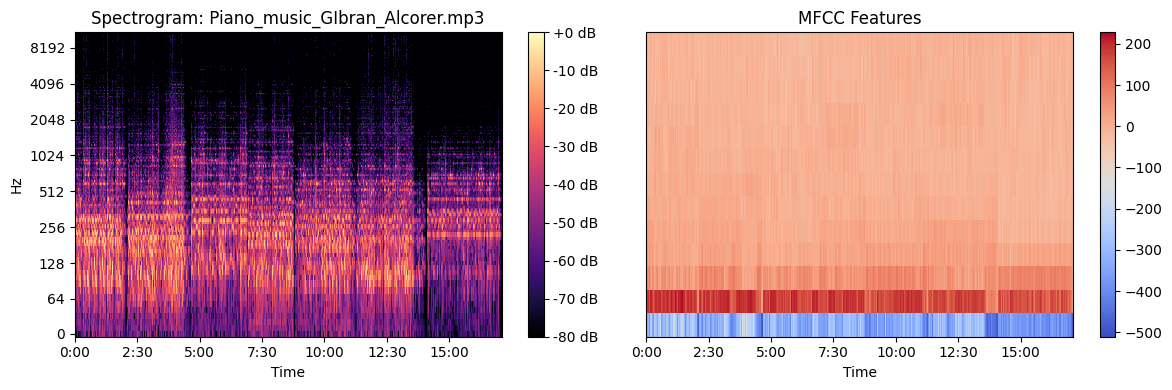

In [ ]:
import librosa.display

def process_all_audio(directory):
    audio_files = glob.glob(os.path.join(directory, '*.wav')) + glob.glob(os.path.join(directory, '*.mp3'))
    
    if not audio_files:
        print("No audio files found.")
        return

    for i, audio_path in enumerate(audio_files):
        filename = os.path.basename(audio_path)
        print(f"\n--- Processing Audio {i+1}: {filename} ---")
        
        try:
            # Load
            y, sr = librosa.load(audio_path)
            duration = librosa.get_duration(y=y, sr=sr)
            print(f"   Sample Rate: {sr} Hz | Duration: {duration:.2f}s")
            
            # Visualize
            plt.figure(figsize=(12, 4))
            
            # Spectrogram
            plt.subplot(1, 2, 1)
            D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
            librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
            plt.colorbar(format='%+2.0f dB')
            plt.title(f"Spectrogram: {filename}")
            
            # MFCC
            plt.subplot(1, 2, 2)
            mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
            librosa.display.specshow(mfccs, x_axis='time')
            plt.colorbar()
            plt.title("MFCC Features")
            
            plt.tight_layout()
            plt.show()
            
        except Exception as e:
            print(f"   Error processing audio {filename}: {e}")

process_all_audio(DATA_DIR)

### 4. Text Data Formats
*   Download text files in the formats such as TXT, PDF, DOC. Read and parse the data.
*   Download files in the formats such as "JSON" — JavaScript Object Notation (.json), "UBJSON" — Universal Binary JSON (.ubj), “HTML” – Hypertext Markup Language (.html), “XML" - eXtensible Markup Language (.xml) - Read and Parse the data. Explore different python packages for the parsing of different structured and unstructured text files.
*   Text visualization: Word cloud, bubble cloud.

In [ ]:
from bs4 import BeautifulSoup
import json

def process_text(directory):
    print(f"\n--- Processing Text Files ---")
    
    # 1. TXT
    txt_files = glob.glob(os.path.join(directory, '*.txt'))
    if txt_files:
        with open(txt_files[0], 'r', encoding='utf-8', errors='ignore') as f:
            print(f"Content of {os.path.basename(txt_files[0])} (first 100 chars):")
            print(f.read()[:100] + "...")
            
    # 2. JSON
    json_files = glob.glob(os.path.join(directory, '*.json'))
    if json_files:
        with open(json_files[0], 'r') as f:
            data = json.load(f)
            print(f"JSON Keys in {os.path.basename(json_files[0])}: {list(data.keys())}")

    # 3. HTML
    html_files = glob.glob(os.path.join(directory, '*.html'))
    if html_files:
        with open(html_files[0], 'r', encoding='utf-8', errors='ignore') as f:
            soup = BeautifulSoup(f, 'html.parser')
            print(f"HTML Title ({os.path.basename(html_files[0])}): {soup.title.string if soup.title else 'No Title'}")

process_text(DATA_DIR)

ModuleNotFoundError: No module named 'textract'